In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


In [5]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire', na=False),0,1)

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

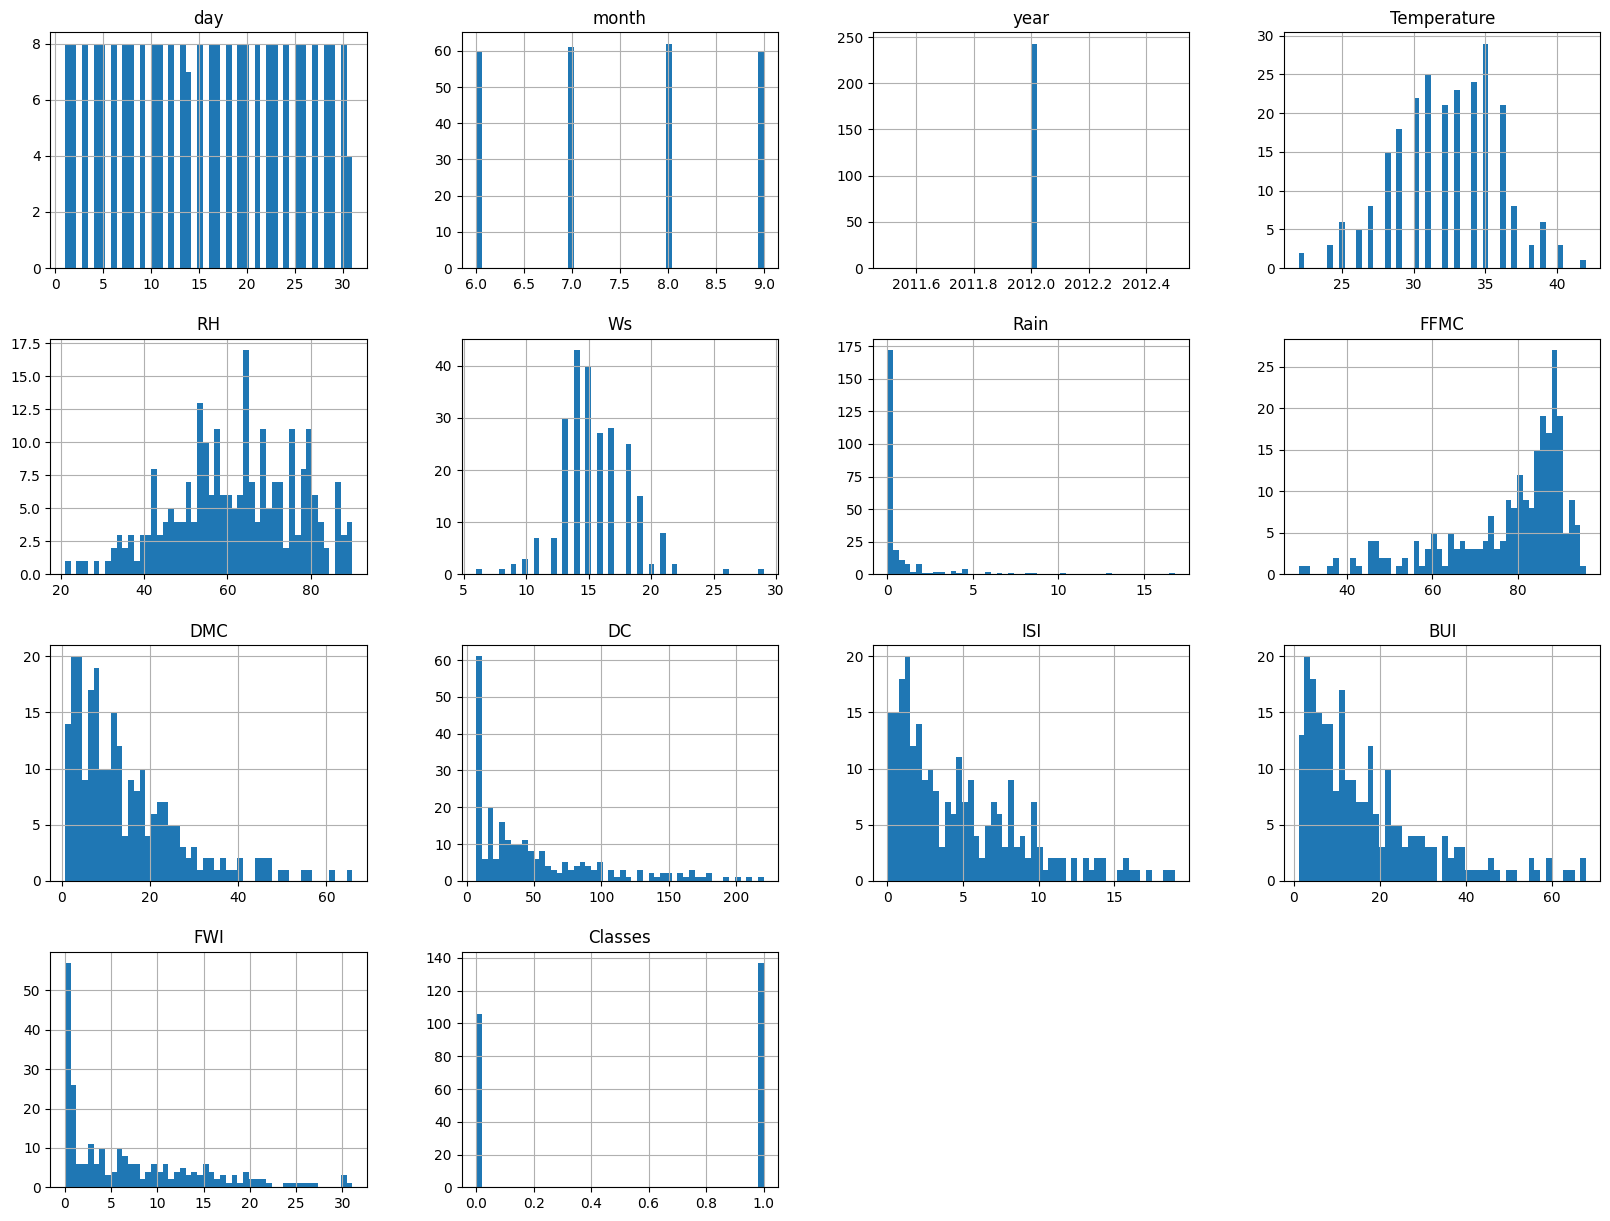

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
percentage=df['Classes'].value_counts(normalize=True)*100

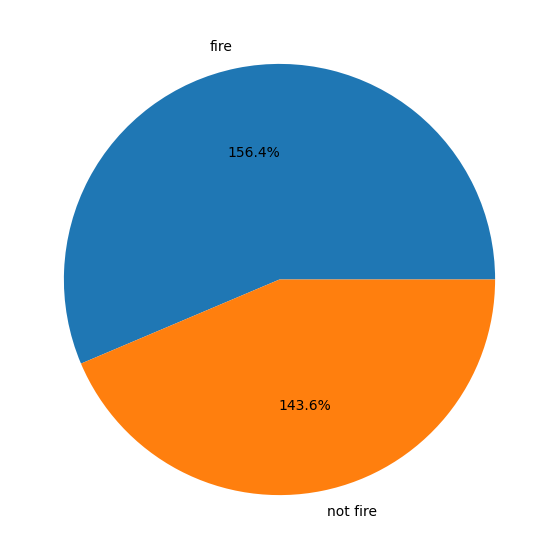

In [10]:
classlables=['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlables,autopct='1%.1f%%')
plt.show()

In [11]:
df = df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [12]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


<Axes: >

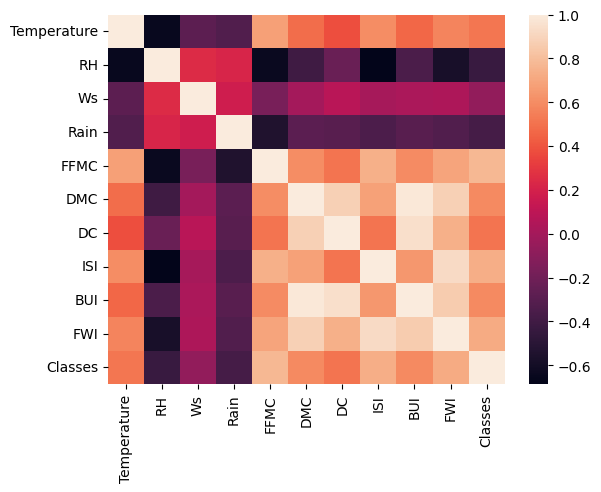

In [13]:
import seaborn as sns
sns.heatmap(df.corr())

<Axes: ylabel='FWI'>

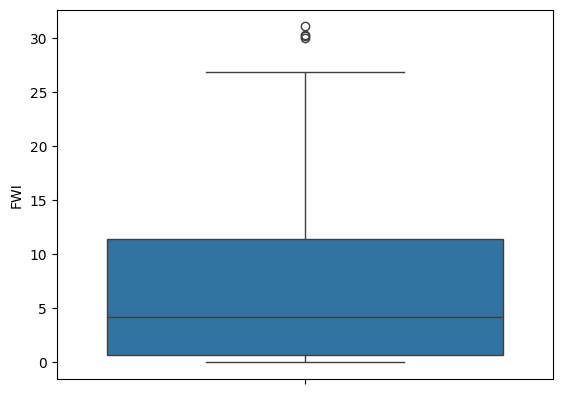

In [14]:
sns.boxplot(df['FWI'])

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [16]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [17]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [18]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0


In [19]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [1]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [45]:
x_train.corr()

NameError: name 'x_train' is not defined

In [ ]:
plt.Figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def colreation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_feature=colreation(x_train,0.85)

In [ ]:
x_train.drop(corr_feature,axis=1,inplace=True)
x_test.drop(corr_feature,axis=1,inplace=True)

In [21]:
x_train.shape,x_test.shape

NameError: name 'x_train' is not defined

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

ModuleNotFoundError: No module named 'sklearn'

NameError: name 'x_train' is not defined

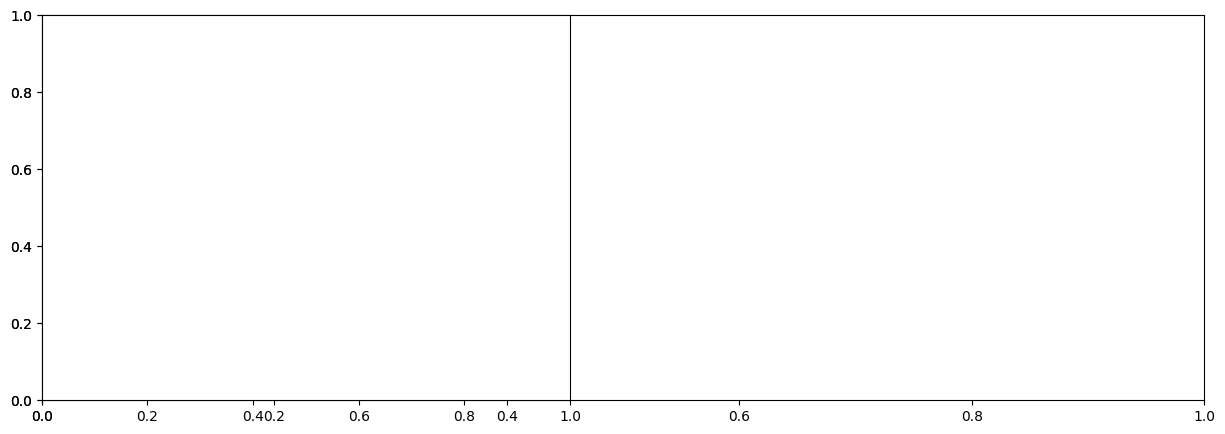

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scale)
plt.title('x_train after scaling')

In [24]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scale,y_train)
y_pred=linreg.predict(x_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('score',score)
plt.scatter(y_test,y_pred)

ModuleNotFoundError: No module named 'sklearn'

In [25]:
#lasso regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Lasso=Lasso()
Lasso.fit(x_train_scale,y_train)
y_pred=Lasso.predict(x_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('score',score)
plt.scatter(y_test,y_pred)

ModuleNotFoundError: No module named 'sklearn'

In [26]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scale,y_train)
y_pred=ridge.predict(x_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('score',score)
plt.scatter(y_test,y_pred)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#elasticnet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scale,y_train)
y_pred=elastic.predict(x_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('score',score)
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scale,y_train)

In [ ]:
lassocv.predict(x_test_scale)

In [ ]:
lassocv.alpha_

In [ ]:
lassocv.alphas_

In [ ]:
lassocv.mse_path_

In [ ]:
y_pred=lassocv.predict(x_test_scale)
plt.scatter(y_test,y_pred)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('score',score)
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scale,y_train)
ridgecv.predict(x_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('score',score)
plt.scatter(y_test,y_pred)

In [ ]:
ridgecv.alphas

In [ ]:
ridgecv.get_params()

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scale,y_train)
elasticcv.predict(x_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('score',score)
plt.scatter(y_test,y_pred)

In [ ]:
elasticcv.alphas_

In [3]:
#pickle the machine learning model and preprocessing model standardscaler
scaler


NameError: name 'scaler' is not defined